In [247]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torch.autograd import Variable
from sklearn import datasets
from sklearn.model_selection import train_test_split
from numpy import random

In [248]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device, torch.cuda.get_device_name())

In [249]:
# FloatTensor = torch.cuda.FloatTensor
# LongTensor = torch.cuda.LongTensor

FloatTensor = torch.FloatTensor
LongTensor = torch.LongTensor

In [ ]:
import kagglehub

In [250]:
import pandas as pd

In [5]:
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 6.18k/6.18k [00:00<00:00, 6.32MB/s]

Extracting model files...
Path to dataset files: C:\Users\Илья\.cache\kagglehub\datasets\johnsmith88\heart-disease-dataset\versions\2


In [10]:
df = pd.read_csv('data/heart.csv')

In [11]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [19]:
X = df.loc[:, df.columns != 'target'].to_numpy()
X.shape

(1025, 13)

In [21]:
y = df.loc[:, df.columns == 'target'].to_numpy().flatten()
y.shape

(1025,)

In [235]:
train_data = pd.read_csv("data/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [236]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [237]:
test_data = pd.read_csv("data/titanic/train.csv")
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [238]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [239]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [240]:
y = train_data["Survived"]
y.shape

(891,)

In [241]:
X = train_data.loc[:, train_data.columns != 'Survived']
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [242]:
X = X.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,NaN,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [243]:
features = ['Sex']
X_dummies = pd.get_dummies(X[features], dtype=int)
X_test_dummies = pd.get_dummies(test_data[features], dtype=int)
X_dummies

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [244]:
X = X.drop(features, axis=1)
X['Sex_female'] = X_dummies['Sex_female']
X['Sex_male'] = X_dummies['Sex_male']
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1
887,1,19.0,0,0,30.0000,1,0
888,3,NaN,1,2,23.4500,1,0
889,1,26.0,0,0,30.0000,0,1


In [245]:
X = X.dropna()
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,1,0
886,2,27.0,0,0,13.0000,0,1
887,1,19.0,0,0,30.0000,1,0
889,1,26.0,0,0,30.0000,0,1


In [246]:
X = X.to_numpy()
X.shape

(714, 7)

In [391]:
dataset = datasets.fetch_covtype()
dataset

{'data': array([[2.596e+03, 5.100e+01, 3.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.590e+03, 5.600e+01, 2.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.804e+03, 1.390e+02, 9.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [2.386e+03, 1.590e+02, 1.700e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.384e+03, 1.700e+02, 1.500e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.383e+03, 1.650e+02, 1.300e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 'target': array([5, 5, 2, ..., 3, 3, 3]),
 'frame': None,
 'target_names': ['Cover_Type'],
 'feature_names': ['Elevation',
  'Aspect',
  'Slope',
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology',
  'Horizontal_Distance_To_Roadways',
  'Hillshade_9am',
  'Hillshade_Noon',
  'Hillshade_3pm',
  'Horizontal_Distance_To_Fire_Points',
  'Wilderness_Area_0',
  'Wilderness_Area_1',
  'Wilderness_Area_2',
  'Wildernes

In [392]:
X = dataset['data']
X.shape

(581012, 54)

In [393]:
y = dataset['target']
y.shape

(581012,)

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = X_train[:389000, ...]
y_train = y_train[:389000]

In [395]:
X_train.shape, y_train.shape

((389000, 54), (389000,))

In [396]:
X_test.shape, y_test.shape

((191734, 54), (191734,))

# Common functions (Nearest Centroid prediction, KNN prediction, accuracy calculation)

In [251]:
from collections import Counter
from tqdm import tqdm

In [252]:
def make_dict(X, y):
    result = dict()
    for i in range(y.shape[0]):
        target = y[i].item()
        data = X[i]
        if result.get(target) is None:
            result[target] = torch.unsqueeze(data, 0)
        else:
            result[target] = torch.cat((result.get(target), torch.unsqueeze(data, 0)))
    return result

In [253]:
def get_mean_distances(test_emb, train_dict):
    res = []
    for key in range(10):
        res.append((((train_dict[key] - test_emb) ** 2).sum(axis=1)).mean())
    return np.array(res)

In [254]:
def predict_nc(test_embeddings, train_dict):
    pred_labels = []
    for test_emb in test_embeddings:
        pred_labels.append(np.argmin(get_mean_distances(test_emb, train_dict)))
    return np.array(pred_labels)

In [255]:
def get_knn_labels(test_emb, train_dict, k):
    train_embeddings = []
    train_labels = []
    for key, val in train_dict.items():
        for train_emb in val:
            train_embeddings.append(train_emb)
            train_labels.append(key)
    train_embeddings = np.stack(train_embeddings, axis=0)
    train_labels = np.array(train_labels)
    distances = ((train_embeddings - test_emb.numpy()) ** 2).sum(axis=1)
    sorted_labels = train_labels[np.argsort(distances)]
    return sorted_labels[:k]

In [256]:
def predict_knn(test_embeddings, train_dict, k=3):
    pred_labels = []
    for test_emb in tqdm(test_embeddings):
        nearest_labels = get_knn_labels(test_emb, train_dict, k)
        pred_labels.append(Counter(nearest_labels).most_common(1)[0][0])
    return np.array(pred_labels)

In [257]:
def calculate_accuracy(pred_labels, y_test):
    return (pred_labels == y_test).sum() / y_test.shape[0]

# Not Siamese network

### Using standart CrossEntropyLoss

In [277]:
# train_data = torchvision.datasets.MNIST(root='./data/', train=True, download=True)
# test_data = torchvision.datasets.MNIST(root='./data/', train=False, download=True)

In [343]:
# train_data = torchvision.datasets.FashionMNIST(root='./data/', train=True, download=True)
# test_data = torchvision.datasets.FashionMNIST(root='./data/', train=False, download=True)

In [410]:
train_data = torchvision.datasets.KMNIST(root='./data/', train=True, download=True)
test_data = torchvision.datasets.KMNIST(root='./data/', train=False, download=True)

In [411]:
X_train = train_data.data.reshape(60000, 784)
y_train = train_data.targets
X_test = test_data.data.reshape(10000, 784)
y_test = test_data.targets

In [412]:
batch_size = 100
train = torch.utils.data.dataset.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)

In [455]:
net = torch.nn.Sequential(
        nn.Linear(784, 512),
        nn.PReLU(512),
        nn.BatchNorm1d(512),
        nn.Linear(512, 512),
        nn.PReLU(512),
        nn.BatchNorm1d(512),
        nn.Linear(512, 10)
)

net = net.type(FloatTensor)

In [456]:
params = net.parameters()
optimizer = torch.optim.Adam(params=params, lr=0.001)
criterion = nn.CrossEntropyLoss()

In [457]:
net.train()
epochs = 5

for i in range(epochs):
    print(f'Epoch: {i}')
    for j, (images, labels) in enumerate(train_loader):
        images = Variable(images.type(FloatTensor))
        labels = Variable(labels).type(LongTensor)

        net.zero_grad()
        optimizer.zero_grad()
        
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4


In [458]:
net.eval()

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): PReLU(num_parameters=512)
  (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): PReLU(num_parameters=512)
  (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Linear(in_features=512, out_features=10, bias=True)
)

In [459]:
X_test = torch.tensor(X_test).type(FloatTensor)
pred_proba_test = net(X_test).cpu().detach()

/var/folders/tt/_dxmbtvs2hg3dvltgsw9jfcsb99qpj/T/ipykernel_22513/1988231417.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test).type(FloatTensor)


In [460]:
pred_test = np.argmax(pred_proba_test, axis=1)

In [461]:
calculate_accuracy(pred_test, y_test)

tensor(0.9099)

MNIST: 0.9725

FashionMNIST: 0.8663

KMNIST: 0.9099

# Contrastive Loss

make_pairs function for creating training dataset consists of pairs

In [258]:
def make_pairs(data, labels, num=1000, p=0.5):
    digits = {}
    for i, j in enumerate(labels):
        if not j.item() in digits:
            digits[j.item()] = []
        digits[j.item()].append(i)
    
    pairs, labels_ = [], []
    for i in range(num):
        if np.random.rand() > p: # same digit
            digit = np.random.choice(range(0, 10))
            d1, d2 = np.random.choice(digits[digit], size=2, replace=False)
            labels_.append(1)
        else:
            digit1, digit2 = np.random.choice(range(1, 8), size=2, replace=False)
            d1, d2 = np.random.choice(digits[digit1]), np.random.choice(digits[digit2])
            labels_.append(0)
        pairs.append(torch.cat((torch.tensor(data[d1]), torch.tensor(data[d2]))).view(1, 2, 784))
    return torch.cat(pairs), torch.LongTensor(labels_)

In [259]:
train_data = torchvision.datasets.MNIST(root='./data/', train=True, download=True)
test_data = torchvision.datasets.MNIST(root='./data/', train=False, download=True)

In [1128]:
# train_data = torchvision.datasets.FashionMNIST(root='./data/', train=True, download=True)
# test_data = torchvision.datasets.FashionMNIST(root='./data/', train=False, download=True)

In [260]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [261]:
train_data.targets.shape

torch.Size([60000])

In [262]:
X_train = train_data.data.reshape(60000, 784)
y_train = train_data.targets
X_test = test_data.data.reshape(10000, 784)
y_test = test_data.targets

In [297]:
batch_size = 200

pairs_train, labels_train = make_pairs(X_train, y_train, num=y_train.shape[0] * 2)

train = torch.utils.data.dataset.TensorDataset(pairs_train, labels_train)
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)

/var/folders/tt/_dxmbtvs2hg3dvltgsw9jfcsb99qpj/T/ipykernel_2791/2902590150.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pairs.append(torch.cat((torch.tensor(data[d1]), torch.tensor(data[d2]))).view(1, 2, 784))


In [298]:
pairs_train.shape

torch.Size([120000, 2, 784])

In [456]:
net = torch.nn.Sequential(
        nn.Linear(784, 512),
        nn.PReLU(512),
        nn.BatchNorm1d(512),
        nn.Linear(512, 512),
        nn.PReLU(512),
        nn.BatchNorm1d(512),
        nn.Linear(512, 2)
)

net = net.type(FloatTensor)

In [266]:
class ContrastiveLoss(torch.nn.Module):

    def __init__(self, margin_dissim=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin_dissim = margin_dissim

    def forward(self, dist, label):
        loss = torch.mean(0.5 * label * torch.pow(dist, 2) + 0.5 * (1 - label) * torch.pow(torch.clamp(self.margin_dissim - dist, min=0.0), 2))
        return loss

In [267]:
class ContrastiveLossModified(torch.nn.Module):

    def __init__(self, margin_dissim=2.0, margin_sim=0.1):
        super(ContrastiveLossModified, self).__init__()
        self.margin_dissim = margin_dissim
        self.margin_sim = margin_sim

    def forward(self, dist, label):
        loss = torch.mean(0.5 * label * torch.pow(torch.clamp(dist, min=self.margin_sim), 2) + 0.5 * (1 - label) * torch.pow(torch.clamp(self.margin_dissim - dist, min=0.0), 2))
        return loss

In [457]:
params = net.parameters()
optimizer = torch.optim.Adam(params=params, lr=0.001)
criterion = ContrastiveLoss(margin_dissim=4.0)

In [458]:
epochs = 10

net.train()
for i in range(epochs):
    print(f'Epoch: {i}')
    for j, (images, labels) in enumerate(train_loader):
        
        i1, i2 = images.view(batch_size, -1).split(784, dim=1)
        i1 = Variable(i1.type(FloatTensor))
        i2 = Variable(i2.type(FloatTensor))
        labels = Variable(labels).type(LongTensor)

        net.zero_grad()
        optimizer.zero_grad()
        
        output1 = net(i1)
        output2 = net(i2)
        dist = torch.sqrt(((output1 - output2) ** 2).sum(axis=1))
        loss = criterion(dist, labels)
        loss.backward()
        optimizer.step()
        
        if j % 100 == 0:
            print(f'Loss: {loss.item()}')

Epoch: 0
Loss: 2.254204511642456
Loss: 0.8643147349357605
Loss: 0.4793660640716553
Loss: 0.541654109954834
Loss: 0.48118385672569275
Loss: 0.2671484649181366
Epoch: 1
Loss: 0.33344048261642456
Loss: 0.2088398039340973
Loss: 0.2799205482006073
Loss: 0.2448723167181015
Loss: 0.17238201200962067
Loss: 0.2619360387325287
Epoch: 2
Loss: 0.13185405731201172
Loss: 0.13455630838871002
Loss: 0.1786303073167801
Loss: 0.19255809485912323
Loss: 0.2656753659248352
Loss: 0.07689376175403595
Epoch: 3
Loss: 0.1373583823442459
Loss: 0.08668243139982224
Loss: 0.10101142525672913
Loss: 0.09817817062139511
Loss: 0.1811324506998062
Loss: 0.12682707607746124


In [459]:
net.eval()

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): PReLU(num_parameters=512)
  (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): PReLU(num_parameters=512)
  (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Linear(in_features=512, out_features=2, bias=True)
)

In [460]:
X_test.shape

torch.Size([10000, 784])

In [461]:
X_train = torch.tensor(X_train).type(FloatTensor)

/var/folders/tt/_dxmbtvs2hg3dvltgsw9jfcsb99qpj/T/ipykernel_2791/4220187399.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train).type(FloatTensor)


In [462]:
X_test = torch.tensor(X_test).type(FloatTensor)

/var/folders/tt/_dxmbtvs2hg3dvltgsw9jfcsb99qpj/T/ipykernel_2791/2973353628.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test).type(FloatTensor)


In [463]:
train_emb = net(X_train).cpu().detach()
train_emb.shape

torch.Size([60000, 2])

In [464]:
test_emb = net(X_test).cpu().detach()
test_emb.shape

torch.Size([10000, 2])

In [1145]:
train_dict = make_dict(train_emb, y_train)

In [1146]:
train_dict[5].shape

torch.Size([6000, 10])

In [1147]:
y_test = test_data.targets.numpy()

In [1148]:
y_pred_nc = predict_nc(test_emb, train_dict)

In [1151]:
y_pred_knn = predict_knn(test_emb, train_dict, k=5)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [38:53<00:00,  4.29it/s]


In [1150]:
calculate_accuracy(y_pred_nc, y_test)

0.7857

In [1152]:
calculate_accuracy(y_pred_knn, y_test)

0.86

Contrastive, Mod contrastive, Triplet

Forest covertypes: 0.706 vs 0.784 vs 0.654

MNIST: accuracy 0.9833 vs 0.9835 vs 0.973

FashionMNIST: accuracy 0.8464 vs 0.8514 vs 0.8278

KMNIST: accuracy 0.9043 vs 0.9135 vs 0.8952

In [230]:
train_data = torchvision.datasets.FashionMNIST(root='./data/', train=True, download=True)
test_data = torchvision.datasets.FashionMNIST(root='./data/', train=False, download=True)

In [231]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train

In [232]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test

In [233]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [469]:
train_data = torchvision.datasets.KMNIST(root='./data/', train=True, download=True)
test_data = torchvision.datasets.KMNIST(root='./data/', train=False, download=True)

  0%|          | 0/18165135 [00:00<?, ?it/s]

Extracting ./data/KMNIST\raw\train-images-idx3-ubyte.gz to ./data/KMNIST\raw



  0%|          | 0/29497 [00:00<?, ?it/s]

Extracting ./data/KMNIST\raw\train-labels-idx1-ubyte.gz to ./data/KMNIST\raw



  0%|          | 0/3041136 [00:00<?, ?it/s]

Extracting ./data/KMNIST\raw\t10k-images-idx3-ubyte.gz to ./data/KMNIST\raw



  0%|          | 0/5120 [00:00<?, ?it/s]

Extracting ./data/KMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/KMNIST\raw

Processing...
Done!


In [470]:
train_data

Dataset KMNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train

In [471]:
test_data

Dataset KMNIST
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test

In [472]:
train_data.data.shape

torch.Size([60000, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

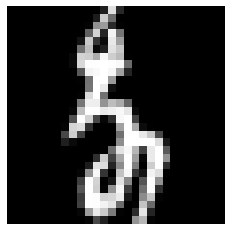

In [479]:
fig = plt.figure()
ax = plt.imshow(train_data.data[6], cmap='gray')
plt.grid(False)
plt.axis('off')

In [189]:
np.sqrt(5828)

76.34133873596926

In [221]:
contrastive_res_map = dict()
m = 2.0
v_list = np.linspace(0.0, 1.0, 30)

In [222]:
for v in v_list:
    
    net = torch.nn.Sequential(
        nn.Linear(784, 512),
        nn.PReLU(512),
        nn.BatchNorm1d(512),
        nn.Linear(512, 512),
        nn.PReLU(512),
        nn.BatchNorm1d(512),
        nn.Linear(512, 10)
    )
    net = net.type(FloatTensor)
    
    params = net.parameters()
    optimizer = torch.optim.Adam(params=params, lr=0.001)
    criterion = ContrastiveLossModified(margin_dissim=m, margin_sim=v)

    epochs = 5
    for i in range(epochs):
        for j, (images, labels) in enumerate(train_loader):
            net.train()
            
            i1, i2 = images.view(batch_size, -1).split(784, dim=1)
            i1 = Variable(i1.type(FloatTensor))
            i2 = Variable(i2.type(FloatTensor))
            labels = Variable(labels).type(LongTensor)
    
            net.zero_grad()
            output1 = net(i1)
            output2 = net(i2)
            dist = torch.sqrt(((output1 - output2) ** 2).sum(axis=1))
            loss = criterion(dist, labels)
            loss.backward()
            optimizer.step()

    net.eval()
                
    X_train = torch.tensor(X_train).type(FloatTensor)
    X_test = torch.tensor(X_test).type(FloatTensor)
    train_emb = net(X_train).cpu().detach()
    test_emb = net(X_test).cpu().detach()
    train_dict = make_dict(train_emb, y_train)
    y_test = test_data.targets.numpy()
    res = calculate_accuracy(test_emb, train_dict, y_test)
    contrastive_res_map[v] = res
    print(f'v = {v}: accuracy = {res}')

/var/folders/tt/_dxmbtvs2hg3dvltgsw9jfcsb99qpj/T/ipykernel_10174/1320488795.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train).type(FloatTensor)
/var/folders/tt/_dxmbtvs2hg3dvltgsw9jfcsb99qpj/T/ipykernel_10174/1320488795.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test).type(FloatTensor)


v = 0.0: accuracy = 0.9594
v = 0.034482758620689655: accuracy = 0.9619
v = 0.06896551724137931: accuracy = 0.964
v = 0.10344827586206896: accuracy = 0.9637
v = 0.13793103448275862: accuracy = 0.966
v = 0.1724137931034483: accuracy = 0.9608
v = 0.20689655172413793: accuracy = 0.9625
v = 0.24137931034482757: accuracy = 0.9621
v = 0.27586206896551724: accuracy = 0.9633
v = 0.3103448275862069: accuracy = 0.9581
v = 0.3448275862068966: accuracy = 0.9641
v = 0.3793103448275862: accuracy = 0.9571
v = 0.41379310344827586: accuracy = 0.9561
v = 0.4482758620689655: accuracy = 0.9649
v = 0.48275862068965514: accuracy = 0.9581
v = 0.5172413793103449: accuracy = 0.956
v = 0.5517241379310345: accuracy = 0.9602
v = 0.5862068965517241: accuracy = 0.956
v = 0.6206896551724138: accuracy = 0.9523
v = 0.6551724137931034: accuracy = 0.9509
v = 0.6896551724137931: accuracy = 0.9544
v = 0.7241379310344828: accuracy = 0.9517
v = 0.7586206896551724: accuracy = 0.9437
v = 0.7931034482758621: accuracy = 0.9478
v

In [44]:
contrastive_res_map = {0.0: 0.9594, 0.034482758620689655: 0.9619, 0.06896551724137931: 0.964, 0.10344827586206896: 0.9637, 0.13793103448275862: 0.966, 0.1724137931034483: 0.9648, 0.20689655172413793: 0.9625, 0.24137931034482757: 0.9621, 0.27586206896551724: 0.9633, 0.3103448275862069: 0.9627, 0.3448275862068966: 0.9603, 0.3793103448275862: 0.9571, 0.41379310344827586: 0.9561, 0.4482758620689655: 0.9587, 0.48275862068965514: 0.9581, 0.5172413793103449: 0.956, 0.5517241379310345: 0.9583, 0.5862068965517241: 0.956, 0.6206896551724138: 0.9523, 0.6551724137931034: 0.9509, 0.6896551724137931: 0.9544, 0.7241379310344828: 0.9517, 0.7586206896551724: 0.9474, 0.7931034482758621: 0.9478, 0.8275862068965517: 0.9501, 0.8620689655172413: 0.9459, 0.896551724137931: 0.9466, 0.9310344827586207: 0.9487, 0.9655172413793103: 0.9472, 1.0: 0.9464}

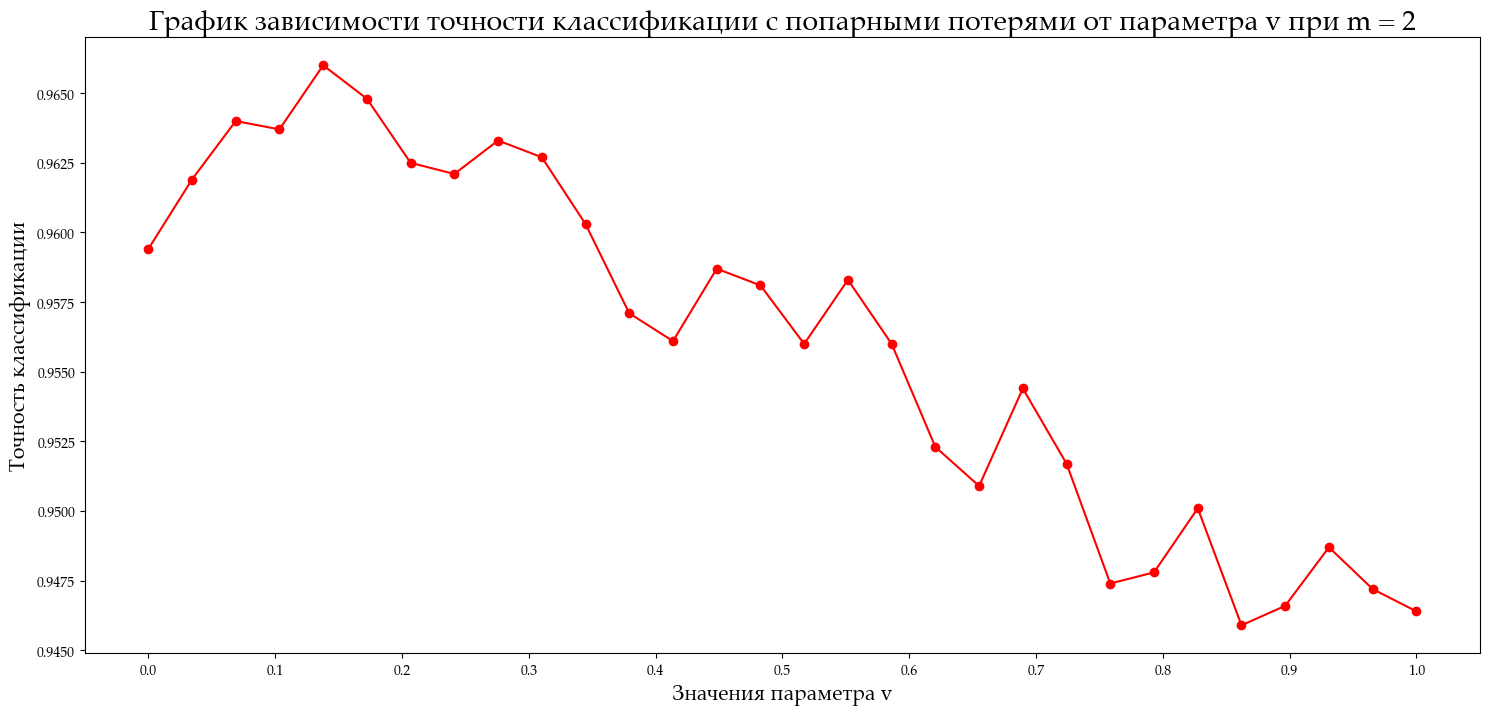

In [45]:
fig = plt.figure(figsize=(18, 8))
plt.plot(contrastive_res_map.keys(), contrastive_res_map.values(), color='red', marker='.', ms=12)
plt.title('График зависимости точности классификации с попарными потерями от параметра v при m = 2', fontsize=20)
plt.xlabel('Значения параметра v', fontsize=15)
plt.ylabel('Точность классификации', fontsize=15)
plt.xticks(np.arange(0, 1.1, 0.1))
# plt.yticks(np.arange(0, 2.2, 0.2))
# plt.ylim([0.95, 1])
plt.show()

In [46]:
fig.savefig('contrastive_loss_acc.pdf', format='pdf', dpi=600)

Zapf NOT subset; don't know how to subset; dropped
fdsc NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


In [246]:
print(contrastive_res_map)

{0.0: 0.9594, 0.034482758620689655: 0.9619, 0.06896551724137931: 0.964, 0.10344827586206896: 0.9637, 0.13793103448275862: 0.966, 0.1724137931034483: 0.9648, 0.20689655172413793: 0.9625, 0.24137931034482757: 0.9621, 0.27586206896551724: 0.9633, 0.3103448275862069: 0.9627, 0.3448275862068966: 0.9603, 0.3793103448275862: 0.9571, 0.41379310344827586: 0.9561, 0.4482758620689655: 0.9587, 0.48275862068965514: 0.9581, 0.5172413793103449: 0.956, 0.5517241379310345: 0.9583, 0.5862068965517241: 0.956, 0.6206896551724138: 0.9523, 0.6551724137931034: 0.9509, 0.6896551724137931: 0.9544, 0.7241379310344828: 0.9517, 0.7586206896551724: 0.9474, 0.7931034482758621: 0.9478, 0.8275862068965517: 0.9501, 0.8620689655172413: 0.9459, 0.896551724137931: 0.9466, 0.9310344827586207: 0.9487, 0.9655172413793103: 0.9472, 1.0: 0.9464}


In [56]:
best_m = []
best_v = []
best_acc = []
for m_val in m:
    best_m.append(m_val)
    max_acc = 0.0
    for key, value in res_map.items():
        if key[0] == m_val and value > max_acc:
            max_v = key[1]
            max_acc = value
    best_v.append(max_v)
    best_acc.append(max_acc)

In [60]:
print(best_m)

[1.0, 1.4736842105263157, 1.9473684210526314, 2.4210526315789473, 2.894736842105263, 3.3684210526315788, 3.8421052631578947, 4.315789473684211, 4.789473684210526, 5.263157894736842, 5.7368421052631575, 6.2105263157894735, 6.684210526315789, 7.157894736842105, 7.63157894736842, 8.105263157894736, 8.578947368421051, 9.052631578947368, 9.526315789473683, 10.0]


In [61]:
print(best_v)

[0.10526315789473684, 0.21052631578947367, 0.21052631578947367, 0.21052631578947367, 0.10526315789473684, 0.0, 0.0, 0.10526315789473684, 0.0, 0.0, 0.10526315789473684, 0.42105263157894735, 0.10526315789473684, 0.631578947368421, 0.0, 0.9473684210526315, 0.9473684210526315, 0.7368421052631579, 0.10526315789473684, 1.4736842105263157]


In [124]:
i = 19
best_m[i], best_v[i]

(10.0, 1.4736842105263157)

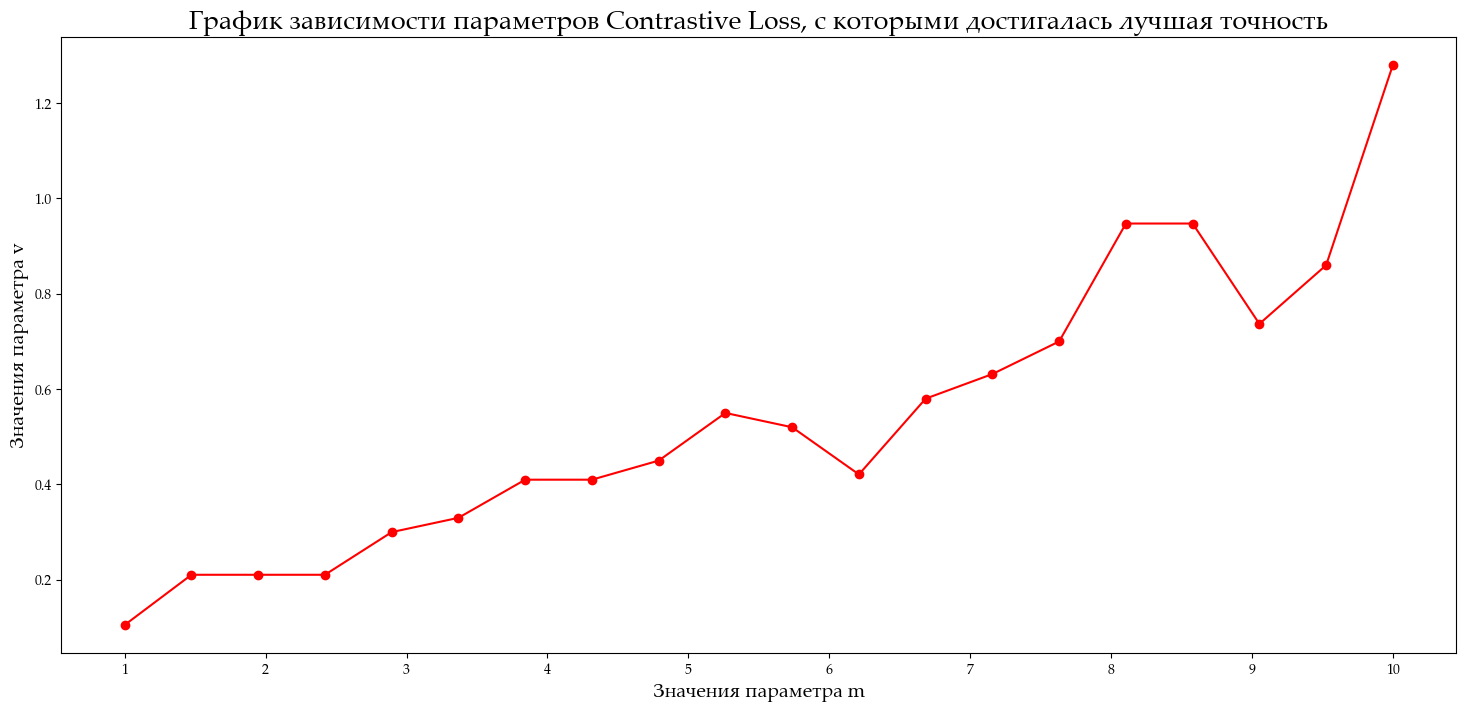

In [137]:
fig = plt.figure(figsize=(18, 8))
plt.plot(best_m, best_v, color='red', marker='.', ms=12)
plt.title('График зависимости параметров Contrastive Loss, с которыми достигалась лучшая точность', fontsize=19)
plt.xlabel('Значения параметра m', fontsize=14)
plt.ylabel('Значения параметра v', fontsize=14)
plt.xticks(np.arange(1, 11))
# plt.yticks(np.arange(800, 1501, 100))
plt.show()

In [138]:
fig.savefig('contrastive_loss_params.pdf', format='pdf', dpi=600)

Zapf NOT subset; don't know how to subset; dropped
fdsc NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


In [465]:
emb_0 = train_emb[y_train == 0]
emb_1 = train_emb[y_train == 1]
emb_2 = train_emb[y_train == 2]
emb_3 = train_emb[y_train == 3]
emb_4 = train_emb[y_train == 4]
emb_5 = train_emb[y_train == 5]
emb_6 = train_emb[y_train == 6]
emb_7 = train_emb[y_train == 7]
emb_8 = train_emb[y_train == 8]
emb_9 = train_emb[y_train == 9]

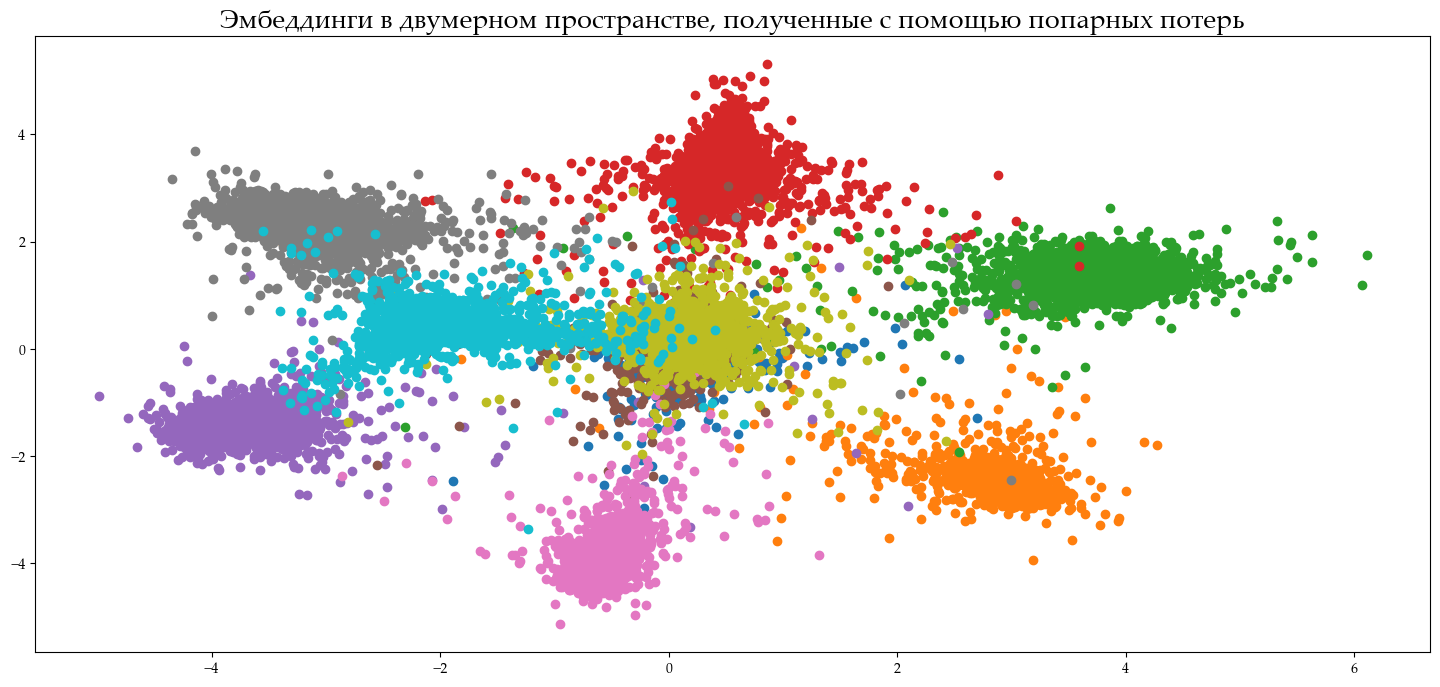

In [466]:
fig = plt.figure(figsize=(18, 8))
plt.scatter(emb_0[:, 0], emb_0[:, 1])
plt.scatter(emb_1[:, 0], emb_1[:, 1])
plt.scatter(emb_2[:, 0], emb_2[:, 1])
plt.scatter(emb_3[:, 0], emb_3[:, 1])
plt.scatter(emb_4[:, 0], emb_4[:, 1])
plt.scatter(emb_5[:, 0], emb_5[:, 1])
plt.scatter(emb_6[:, 0], emb_6[:, 1])
plt.scatter(emb_7[:, 0], emb_7[:, 1])
plt.scatter(emb_8[:, 0], emb_8[:, 1])
plt.scatter(emb_9[:, 0], emb_9[:, 1])
plt.title('Эмбеддинги в двумерном пространстве, полученные с помощью попарных потерь', fontsize=19)
plt.show()

In [467]:
fig.savefig('visualization.pdf', format='pdf', dpi=600)

Zapf NOT subset; don't know how to subset; dropped
fdsc NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


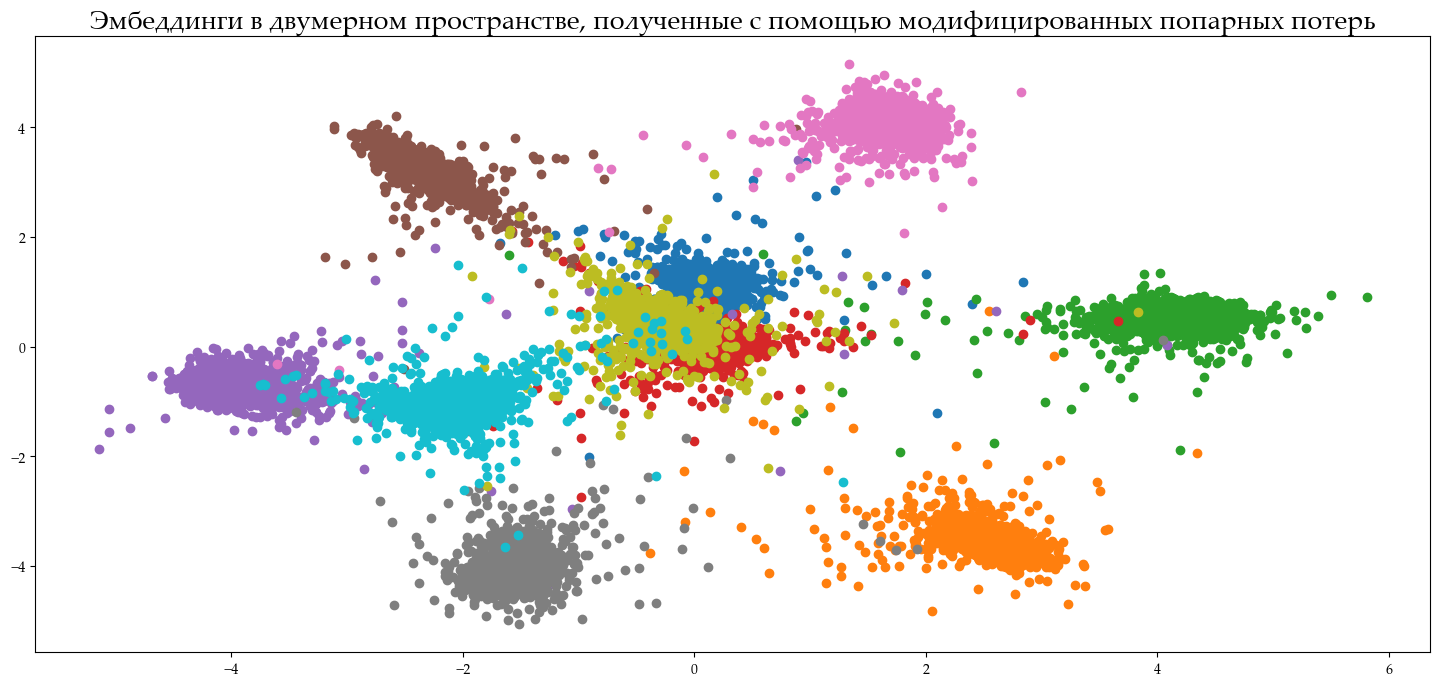

In [409]:
fig = plt.figure(figsize=(18, 8))
plt.scatter(emb_0[:, 0], emb_0[:, 1])
plt.scatter(emb_1[:, 0], emb_1[:, 1])
plt.scatter(emb_2[:, 0], emb_2[:, 1])
plt.scatter(emb_3[:, 0], emb_3[:, 1])
plt.scatter(emb_4[:, 0], emb_4[:, 1])
plt.scatter(emb_5[:, 0], emb_5[:, 1])
plt.scatter(emb_6[:, 0], emb_6[:, 1])
plt.scatter(emb_7[:, 0], emb_7[:, 1])
plt.scatter(emb_8[:, 0], emb_8[:, 1])
plt.scatter(emb_9[:, 0], emb_9[:, 1])
plt.title('Эмбеддинги в двумерном пространстве, полученные с помощью модифицированных попарных потерь', fontsize=19)
plt.show()

In [410]:
fig.savefig('visualization_modified.pdf', format='pdf', dpi=600)

Zapf NOT subset; don't know how to subset; dropped
fdsc NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


# Triplet Loss

create_batch function for creating training dataset consists of tripls

In [1033]:
def create_batch(batch_size):
    anchors=np.zeros((batch_size,784))
    positives=np.zeros((batch_size,784))
    negatives=np.zeros((batch_size,784))
    
    for i in range(0,batch_size):
            index=random.randint(0,len(X_train)-1)
            anc=X_train[index]
            label_of_anc=y_train[index]
            indices_of_pos=np.squeeze(np.where(y_train==label_of_anc))
            indices_of_neg=np.squeeze(np.where(y_train!=label_of_anc))
            #print(indices_of_pos)
            pos=X_train[indices_of_pos[random.randint(0,len(indices_of_pos)-1)]]
            neg=X_train[indices_of_neg[random.randint(0,len(indices_of_neg)-1)]]
            positives[i]=pos
            negatives[i]=neg
            anchors[i]=anc
    return [anchors,positives,negatives]

In [1034]:
train_data = torchvision.datasets.MNIST(root='./data/', train=True, download=True)
test_data = torchvision.datasets.MNIST(root='./data/', train=False, download=True)

In [7]:
# train_data = torchvision.datasets.FashionMNIST(root='./data/', train=True, download=True)
# test_data = torchvision.datasets.FashionMNIST(root='./data/', train=False, download=True)

In [8]:
# train_data = torchvision.datasets.KMNIST(root='./data/', train=True, download=True)
# test_data = torchvision.datasets.KMNIST(root='./data/', train=False, download=True)

In [1035]:
X_train = train_data.data.reshape(60000, 784)
y_train = train_data.targets
X_test = test_data.data.reshape(10000, 784)
y_test = test_data.targets

In [1083]:
net = torch.nn.Sequential(
        nn.Linear(784, 512),
        nn.PReLU(512),
        nn.BatchNorm1d(512),
        nn.Linear(512, 512),
        nn.PReLU(512),
        nn.BatchNorm1d(512),
        nn.Linear(512, 10))

net = net.type(FloatTensor)

In [1084]:
params = net.parameters()
optimizer = torch.optim.Adam(params=params, lr=0.001)

In [1085]:
alpha = 2.0

In [1058]:
net.train()
for i in range(1000):
    anchors, positives, negatives = create_batch(200)
    net.zero_grad()
    optimizer.zero_grad()
    
    anchors = net(torch.tensor(anchors).type(FloatTensor))
    positives = net(torch.tensor(positives).type(FloatTensor))
    negatives = net(torch.tensor(negatives).type(FloatTensor))
    dp = ((anchors - positives) ** 2).sum(axis=1)
    dn = ((anchors - negatives) ** 2).sum(axis=1)
    loss = torch.mean(torch.clamp(dp ** 2  - dn ** 2 + alpha, min=0.0))
    if i % 50 == 0:
        print(f'{i // 10}%, loss={loss}')
    loss.backward()
    optimizer.step()

0%, loss=15.981902122497559
5%, loss=0.9163497686386108
10%, loss=0.3786792457103729
15%, loss=0.3233743906021118
20%, loss=0.252868115901947
25%, loss=0.20677438378334045
30%, loss=0.17167426645755768
35%, loss=0.17678715288639069
40%, loss=0.2942909598350525
45%, loss=0.18269309401512146
50%, loss=0.09498395770788193
55%, loss=0.17364554107189178
60%, loss=0.04780006408691406
65%, loss=0.19708748161792755
70%, loss=0.24361823499202728
75%, loss=0.06740012019872665
80%, loss=0.19201235473155975
85%, loss=0.13129852712154388
90%, loss=0.16266120970249176
95%, loss=0.1803549975156784


In [1088]:
X_train = torch.tensor(X_train).type(FloatTensor)

/var/folders/tt/_dxmbtvs2hg3dvltgsw9jfcsb99qpj/T/ipykernel_22513/4220187399.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train).type(FloatTensor)


In [1089]:
train_emb = net(X_train).cpu().detach()
train_emb.shape

torch.Size([60000, 10])

In [1090]:
X_test = torch.tensor(X_test).type(FloatTensor)

/var/folders/tt/_dxmbtvs2hg3dvltgsw9jfcsb99qpj/T/ipykernel_22513/2973353628.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test).type(FloatTensor)


In [1091]:
test_emb = net(X_test).cpu().detach()
test_emb.shape

torch.Size([10000, 10])

In [1092]:
train_dict = make_dict(train_emb, y_train)

In [1093]:
y_test = test_data.targets.numpy()

In [1094]:
y_pred_nc = predict_nc(test_emb, train_dict)

In [ ]:
y_pred_knn = predict_knn(test_emb, train_dict, k=5)

In [1095]:
calculate_accuracy(y_pred_nc, y_test)

0.9448

MNIST: 0.9274 vs 0.9348

FashionMNIST: 0.7746 vs 0.7829

KMNIST: 0.7334 vs 0.7642

## Modified Triplet Loss

In [1086]:
beta=0.2

In [1087]:
net.train()
for i in range(1000):
    anchors, positives, negatives = create_batch(200)
    net.zero_grad()
    optimizer.zero_grad()
    anchors = net(torch.tensor(anchors).type(FloatTensor))
    positives = net(torch.tensor(positives).type(FloatTensor))
    negatives = net(torch.tensor(negatives).type(FloatTensor))
    dp = ((anchors - positives) ** 2).sum(axis=1)
    dn = ((anchors - negatives) ** 2).sum(axis=1)
    loss = torch.mean(torch.clamp((torch.clamp(dp, min=beta)) ** 2  - dn ** 2 + alpha, min=0.0))
    if i % 50 == 0:
        print(f'{i // 10}%, loss={loss}')
    loss.backward()
    optimizer.step()

0%, loss=14.972787857055664
5%, loss=0.7289018034934998
10%, loss=0.3225722908973694
15%, loss=0.2795156240463257
20%, loss=0.19879068434238434
25%, loss=0.29422637820243835
30%, loss=0.18970808386802673
35%, loss=0.151548370718956
40%, loss=0.2301701307296753
45%, loss=0.23225156962871552
50%, loss=0.4266977310180664
55%, loss=0.24451854825019836
60%, loss=0.1781097799539566
65%, loss=0.07834489643573761
70%, loss=0.14447525143623352
75%, loss=0.1272575706243515
80%, loss=0.09316045045852661
85%, loss=0.27128031849861145
90%, loss=0.10666980594396591
95%, loss=0.06935160607099533


In [29]:
triplet_res_map = dict()
m = 2.0
v_list = np.linspace(0.0, 1.0, 30)

In [30]:
for v in v_list:
    
    net = torch.nn.Sequential(
        nn.Linear(784, 512),
        nn.PReLU(512),
        nn.BatchNorm1d(512),
        nn.Linear(512, 512),
        nn.PReLU(512),
        nn.BatchNorm1d(512),
        nn.Linear(512, 10)
    )
    net = net.type(FloatTensor)
    
    params = net.parameters()
    optimizer = torch.optim.Adam(params=params, lr=0.001)

    for i in range(1000):
        net.train()
        anchors, positives, negatives = create_batch(100)
        net.zero_grad()
        anchors = net(torch.tensor(anchors).type(FloatTensor))
        positives = net(torch.tensor(positives).type(FloatTensor))
        negatives = net(torch.tensor(negatives).type(FloatTensor))
        dp = ((anchors - positives) ** 2).sum(axis=1)
        dn = ((anchors - negatives) ** 2).sum(axis=1)
        loss = torch.mean(torch.clamp((torch.clamp(dp, min=v)) ** 2  - dn ** 2 + m, min=0.0))
        loss.backward()
        optimizer.step()

    net.eval()
                
    X_train = torch.tensor(X_train).type(FloatTensor)
    X_test = torch.tensor(X_test).type(FloatTensor)
    train_emb = net(X_train).cpu().detach()
    test_emb = net(X_test).cpu().detach()
    train_dict = make_dict(train_emb, y_train)
    y_test = test_data.targets.numpy()
    res = calculate_accuracy(test_emb, train_dict, y_test)
    triplet_res_map[v] = res
    print(f'v = {v}: accuracy = {res}')

/var/folders/tt/_dxmbtvs2hg3dvltgsw9jfcsb99qpj/T/ipykernel_17196/2342849848.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train).type(FloatTensor)
/var/folders/tt/_dxmbtvs2hg3dvltgsw9jfcsb99qpj/T/ipykernel_17196/2342849848.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test).type(FloatTensor)


v = 0.0: accuracy = 0.9255
v = 0.034482758620689655: accuracy = 0.9323
v = 0.06896551724137931: accuracy = 0.9358
v = 0.10344827586206896: accuracy = 0.9338
v = 0.13793103448275862: accuracy = 0.9236
v = 0.1724137931034483: accuracy = 0.9279
v = 0.20689655172413793: accuracy = 0.9234
v = 0.24137931034482757: accuracy = 0.927
v = 0.27586206896551724: accuracy = 0.9311
v = 0.3103448275862069: accuracy = 0.9325
v = 0.3448275862068966: accuracy = 0.932
v = 0.3793103448275862: accuracy = 0.9291
v = 0.41379310344827586: accuracy = 0.9357
v = 0.4482758620689655: accuracy = 0.9256
v = 0.48275862068965514: accuracy = 0.9332
v = 0.5172413793103449: accuracy = 0.9369
v = 0.5517241379310345: accuracy = 0.9307
v = 0.5862068965517241: accuracy = 0.928
v = 0.6206896551724138: accuracy = 0.9252
v = 0.6551724137931034: accuracy = 0.9171
v = 0.6896551724137931: accuracy = 0.9365
v = 0.7241379310344828: accuracy = 0.9295
v = 0.7586206896551724: accuracy = 0.9328
v = 0.7931034482758621: accuracy = 0.9264


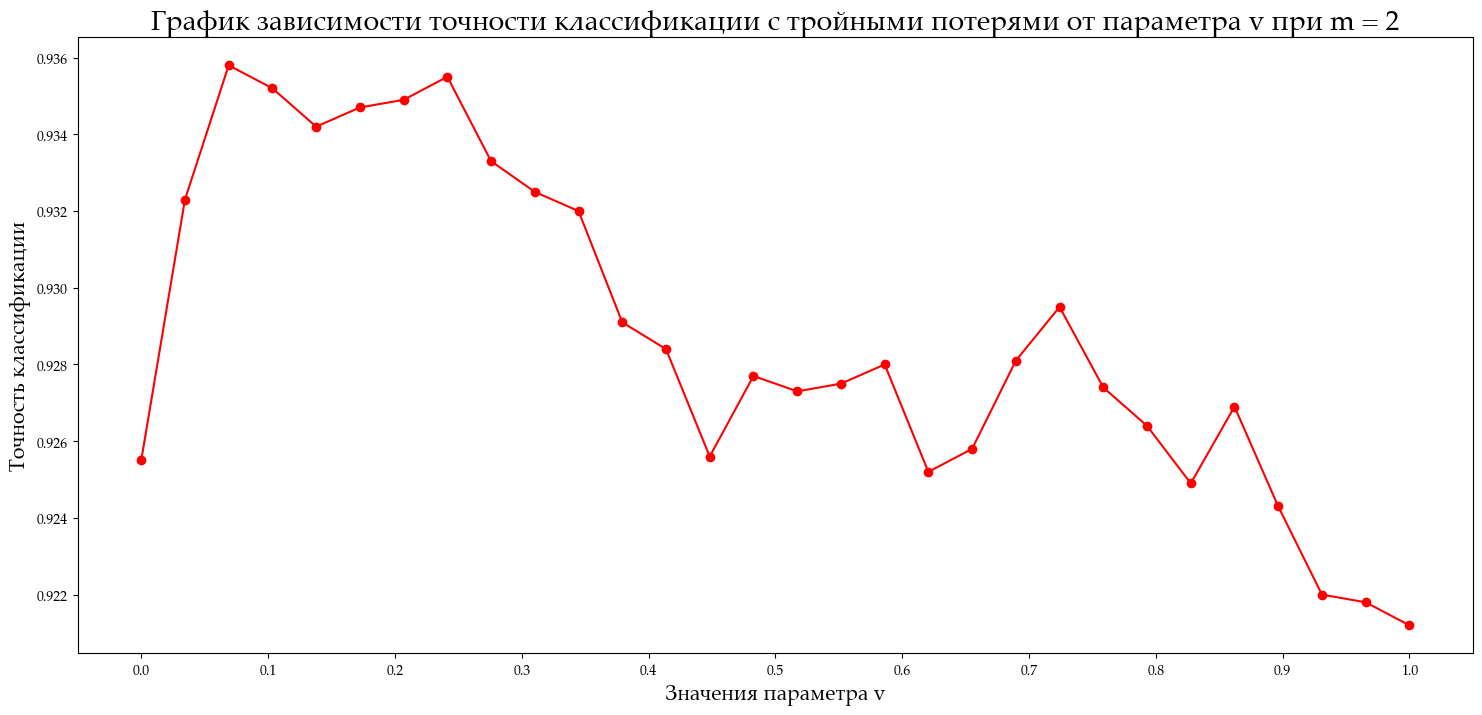

In [40]:
fig = plt.figure(figsize=(18, 8))
plt.plot(triplet_res_map.keys(), triplet_res_map.values(), color='red', marker='.', ms=12)
plt.title('График зависимости точности классификации с тройными потерями от параметра v при m = 2', fontsize=20)
plt.xlabel('Значения параметра v', fontsize=15)
plt.ylabel('Точность классификации', fontsize=15)
plt.xticks(np.arange(0, 1.1, 0.1))
# plt.yticks(np.arange(0, 2.2, 0.2))
# plt.ylim([0.95, 1])
plt.show()

In [41]:
fig.savefig('triplet_loss_acc.pdf', format='pdf', dpi=600)

Zapf NOT subset; don't know how to subset; dropped
fdsc NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


In [42]:
print(triplet_res_map)

{0.0: 0.9255, 0.034482758620689655: 0.9323, 0.06896551724137931: 0.9358, 0.10344827586206896: 0.9352, 0.13793103448275862: 0.9342, 0.1724137931034483: 0.9347, 0.20689655172413793: 0.9349, 0.24137931034482757: 0.9355, 0.27586206896551724: 0.9333, 0.3103448275862069: 0.9325, 0.3448275862068966: 0.932, 0.3793103448275862: 0.9291, 0.41379310344827586: 0.9284, 0.4482758620689655: 0.9256, 0.48275862068965514: 0.9277, 0.5172413793103449: 0.9273, 0.5517241379310345: 0.9275, 0.5862068965517241: 0.928, 0.6206896551724138: 0.9252, 0.6551724137931034: 0.9258, 0.6896551724137931: 0.9281, 0.7241379310344828: 0.9295, 0.7586206896551724: 0.9274, 0.7931034482758621: 0.9264, 0.8275862068965517: 0.9249, 0.8620689655172413: 0.9269, 0.896551724137931: 0.9243, 0.9310344827586207: 0.922, 0.9655172413793103: 0.9218, 1.0: 0.9212}


In [144]:
m = np.linspace(1.0, 10.0, num=20)
v = np.linspace(0.0, 2.0, num=20)
res_map_triplet = dict()

In [146]:
for m_value in m:
    for v_value in v:
        if v_value >= m_value:
            continue
        
        net = torch.nn.Sequential(
            nn.Linear(784, 512),
            nn.PReLU(512),
            nn.BatchNorm1d(512),
            nn.Linear(512, 512),
            nn.PReLU(512),
            nn.BatchNorm1d(512),
            nn.Linear(512, 10)
        )
        net = net.type(FloatTensor)
        
        params = net.parameters()
        optimizer = torch.optim.Adam(params=params, lr=0.001)

        for i in range(1000):
            net.train()
            anchors, positives, negatives = create_batch(100)
            net.zero_grad()
            anchors = net(torch.tensor(anchors).type(FloatTensor))
            positives = net(torch.tensor(positives).type(FloatTensor))
            negatives = net(torch.tensor(negatives).type(FloatTensor))
            dp = ((anchors - positives) ** 2).sum(axis=1)
            dn = ((anchors - negatives) ** 2).sum(axis=1)
            loss = torch.mean(torch.clamp((torch.clamp(dp, min=v_value)) ** 2  - dn ** 2 + m_value, min=0.0))
            loss.backward()
            optimizer.step()
                    
        X_train = torch.tensor(X_train).type(FloatTensor)
        X_test = torch.tensor(X_test).type(FloatTensor)
        train_emb = net(X_train).cpu().detach()
        test_emb = net(X_test).cpu().detach()
        train_dict = make_dict(train_emb, y_train)
        y_test = test_data.targets.numpy()
        res = calculate_accuracy(test_emb, train_dict, y_test)
        res_map_triplet[(m_value, v_value)] = res
        print(f'm = {m_value}, v = {v_value}: accuracy = {res}')

/var/folders/tt/_dxmbtvs2hg3dvltgsw9jfcsb99qpj/T/ipykernel_10174/3349413298.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train).type(FloatTensor)
/var/folders/tt/_dxmbtvs2hg3dvltgsw9jfcsb99qpj/T/ipykernel_10174/3349413298.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test).type(FloatTensor)


m = 1.0, v = 0.0: accuracy = 0.929
m = 1.0, v = 0.10526315789473684: accuracy = 0.926
m = 1.0, v = 0.21052631578947367: accuracy = 0.9278
m = 1.0, v = 0.3157894736842105: accuracy = 0.9311
m = 1.0, v = 0.42105263157894735: accuracy = 0.9282
m = 1.0, v = 0.5263157894736842: accuracy = 0.93
m = 1.0, v = 0.631578947368421: accuracy = 0.9296
m = 1.0, v = 0.7368421052631579: accuracy = 0.9351
m = 1.0, v = 0.8421052631578947: accuracy = 0.9283
m = 1.0, v = 0.9473684210526315: accuracy = 0.9191
m = 1.4736842105263157, v = 0.0: accuracy = 0.9313
m = 1.4736842105263157, v = 0.10526315789473684: accuracy = 0.9294
m = 1.4736842105263157, v = 0.21052631578947367: accuracy = 0.9216
m = 1.4736842105263157, v = 0.3157894736842105: accuracy = 0.9279
m = 1.4736842105263157, v = 0.42105263157894735: accuracy = 0.9365
m = 1.4736842105263157, v = 0.5263157894736842: accuracy = 0.9347
m = 1.4736842105263157, v = 0.631578947368421: accuracy = 0.9294
m = 1.4736842105263157, v = 0.7368421052631579: accuracy =

KeyboardInterrupt: 

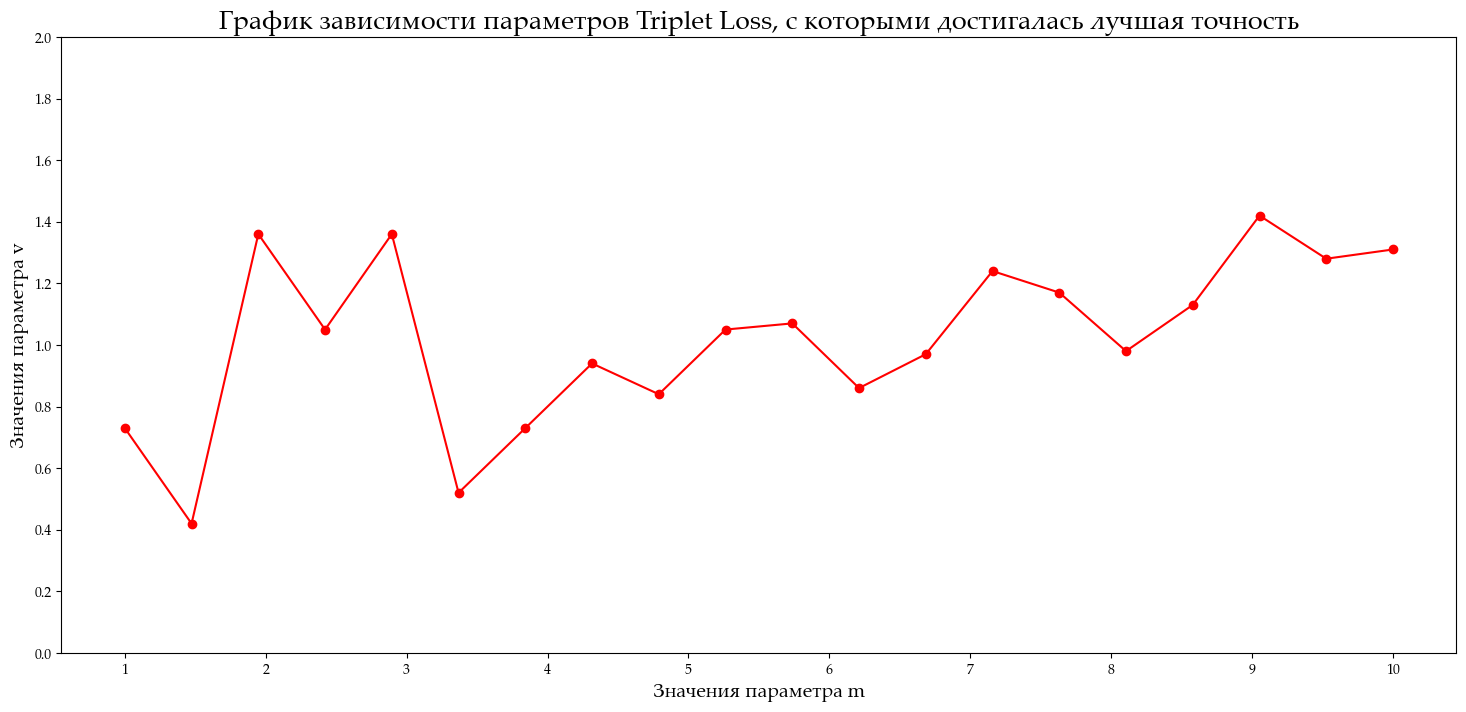

In [153]:
fig = plt.figure(figsize=(18, 8))
plt.plot(best_m, best_v, color='red', marker='.', ms=12)
plt.title('График зависимости параметров Triplet Loss, с которыми достигалась лучшая точность', fontsize=19)
plt.xlabel('Значения параметра m', fontsize=14)
plt.ylabel('Значения параметра v', fontsize=14)
plt.xticks(np.arange(1, 11))
plt.yticks(np.arange(0, 2.2, 0.2))
plt.show()

In [154]:
fig.savefig('triplet_loss_params.pdf', format='pdf', dpi=600)

Zapf NOT subset; don't know how to subset; dropped
fdsc NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


# InfoNCE Loss

In [1114]:
k = 15

create_batch function for creating training dataset consists of anchor, positive and k negatives

In [1097]:
def create_batch(batch_size):
    anchors=np.zeros((batch_size, 784))
    positives=np.zeros((batch_size, 784))
    negatives=np.zeros((batch_size, k, 784))
    
    for i in range(0, batch_size):
            index=random.randint(0,len(X_train)-1)
            anc=X_train[index]
            label_of_anc=y_train[index]
            indices_of_pos=np.squeeze(np.where(y_train==label_of_anc))
            indices_of_neg=np.squeeze(np.where(y_train!=label_of_anc))
            #print(indices_of_pos)
            pos=X_train[indices_of_pos[random.randint(0,len(indices_of_pos)-1)]]
            neg=X_train[np.random.choice(indices_of_neg, size=k, replace=False)]
            positives[i]=pos
            negatives[i]=neg
            anchors[i]=anc
    return [anchors,positives,negatives]

In [1098]:
train_data = torchvision.datasets.MNIST(root='./data/', train=True, download=True)
test_data = torchvision.datasets.MNIST(root='./data/', train=False, download=True)

In [206]:
# train_data = torchvision.datasets.FashionMNIST(root='./data/', train=True, download=True)
# test_data = torchvision.datasets.FashionMNIST(root='./data/', train=False, download=True)

In [256]:
# train_data = torchvision.datasets.KMNIST(root='./data/', train=True, download=True)
# test_data = torchvision.datasets.KMNIST(root='./data/', train=False, download=True)

In [1099]:
X_train = train_data.data.reshape(60000, 784)
y_train = train_data.targets
X_test = test_data.data.reshape(10000, 784)
y_test = test_data.targets

In [1115]:
net = torch.nn.Sequential(
        nn.Linear(784, 512),
        nn.PReLU(512),
        nn.BatchNorm1d(512),
        nn.Linear(512, 512),
        nn.PReLU(512),
        nn.BatchNorm1d(512),
        nn.Linear(512, 10))

net = net.type(FloatTensor)

In [1116]:
params = net.parameters()
optimizer = torch.optim.Adam(params=params, lr=0.001)

In [1117]:
import torch
import torch.nn.functional as F
from torch import nn

In [1118]:
class InfoNCE(nn.Module):
    """
    Calculates the InfoNCE loss for self-supervised learning.
    This contrastive loss enforces the embeddings of similar (positive) samples to be close
        and those of different (negative) samples to be distant.
    A query embedding is compared with one positive key and with one or more negative keys.

    References:
        https://arxiv.org/abs/1807.03748v2
        https://arxiv.org/abs/2010.05113

    Args:
        temperature: Logits are divided by temperature before calculating the cross entropy.
        reduction: Reduction method applied to the output.
            Value must be one of ['none', 'sum', 'mean'].
            See torch.nn.functional.cross_entropy for more details about each option.
        negative_mode: Determines how the (optional) negative_keys are handled.
            Value must be one of ['paired', 'unpaired'].
            If 'paired', then each query sample is paired with a number of negative keys.
            Comparable to a triplet loss, but with multiple negatives per sample.
            If 'unpaired', then the set of negative keys are all unrelated to any positive key.

    Input shape:
        query: (N, D) Tensor with query samples (e.g. embeddings of the input).
        positive_key: (N, D) Tensor with positive samples (e.g. embeddings of augmented input).
        negative_keys (optional): Tensor with negative samples (e.g. embeddings of other inputs)
            If negative_mode = 'paired', then negative_keys is a (N, M, D) Tensor.
            If negative_mode = 'unpaired', then negative_keys is a (M, D) Tensor.
            If None, then the negative keys for a sample are the positive keys for the other samples.

    Returns:
         Value of the InfoNCE Loss.

     Examples:
        >>> loss = InfoNCE()
        >>> batch_size, num_negative, embedding_size = 32, 48, 128
        >>> query = torch.randn(batch_size, embedding_size)
        >>> positive_key = torch.randn(batch_size, embedding_size)
        >>> negative_keys = torch.randn(num_negative, embedding_size)
        >>> output = loss(query, positive_key, negative_keys)
    """

    def __init__(self, temperature=0.1, reduction='mean', negative_mode='unpaired'):
        super().__init__()
        self.temperature = temperature
        self.reduction = reduction
        self.negative_mode = negative_mode

    def forward(self, query, positive_key, negative_keys=None):
        return info_nce(query, positive_key, negative_keys,
                        temperature=self.temperature,
                        reduction=self.reduction,
                        negative_mode=self.negative_mode)


def info_nce(query, positive_key, negative_keys=None, temperature=0.1, reduction='mean', negative_mode='unpaired'):
    # Check input dimensionality.
    if query.dim() != 2:
        raise ValueError('<query> must have 2 dimensions.')
    if positive_key.dim() != 2:
        raise ValueError('<positive_key> must have 2 dimensions.')
    if negative_keys is not None:
        if negative_mode == 'unpaired' and negative_keys.dim() != 2:
            raise ValueError("<negative_keys> must have 2 dimensions if <negative_mode> == 'unpaired'.")
        if negative_mode == 'paired' and negative_keys.dim() != 3:
            raise ValueError("<negative_keys> must have 3 dimensions if <negative_mode> == 'paired'.")

    # Check matching number of samples.
    if len(query) != len(positive_key):
        raise ValueError('<query> and <positive_key> must must have the same number of samples.')
    if negative_keys is not None:
        if negative_mode == 'paired' and len(query) != len(negative_keys):
            raise ValueError("If negative_mode == 'paired', then <negative_keys> must have the same number of samples as <query>.")

    # Embedding vectors should have same number of components.
    if query.shape[-1] != positive_key.shape[-1]:
        raise ValueError('Vectors of <query> and <positive_key> should have the same number of components.')
    if negative_keys is not None:
        if query.shape[-1] != negative_keys.shape[-1]:
            raise ValueError('Vectors of <query> and <negative_keys> should have the same number of components.')

    # Normalize to unit vectors
    query, positive_key, negative_keys = normalize(query, positive_key, negative_keys)
    if negative_keys is not None:
        # Explicit negative keys

        # Cosine between positive pairs
        positive_logit = torch.sum(query * positive_key, dim=1, keepdim=True)

        if negative_mode == 'unpaired':
            # Cosine between all query-negative combinations
            negative_logits = query @ transpose(negative_keys)

        elif negative_mode == 'paired':
            query = query.unsqueeze(1)
            negative_logits = query @ transpose(negative_keys)
            negative_logits = negative_logits.squeeze(1)

        # First index in last dimension are the positive samples
        logits = torch.cat([positive_logit, negative_logits], dim=1)
        labels = torch.zeros(len(logits), dtype=torch.long, device=query.device)
    else:
        # Negative keys are implicitly off-diagonal positive keys.

        # Cosine between all combinations
        logits = query @ transpose(positive_key)

        # Positive keys are the entries on the diagonal
        labels = torch.arange(len(query), device=query.device)

    return F.cross_entropy(logits / temperature, labels, reduction=reduction)


def transpose(x):
    return x.transpose(-2, -1)


def normalize(*xs):
    return [None if x is None else F.normalize(x, dim=-1) for x in xs]

In [1119]:
loss = InfoNCE(negative_mode='paired')

In [1120]:
net.train()
for i in range(1000):
    anchors, positives, negatives = create_batch(100)
    net.zero_grad()
    optimizer.zero_grad()
    anchors = net(torch.tensor(anchors).type(FloatTensor))
    positives = net(torch.tensor(positives).type(FloatTensor))
    neg_list = []
    for j in range(100):
        n_j = net(torch.tensor(negatives[j]).type(FloatTensor))
        neg_list.append(n_j)
    negatives = torch.stack(neg_list, dim=0)

    l = loss(anchors, positives, negatives)
    if i % 50 == 0:
        print(f'{i // 10}%, loss={l}')
    l.backward()
    optimizer.step()

0%, loss=5.010801315307617
5%, loss=0.9941871762275696
10%, loss=0.9168933033943176
15%, loss=0.6625989675521851
20%, loss=0.46998733282089233
25%, loss=0.4957210123538971
30%, loss=0.35472312569618225
35%, loss=0.4049158990383148
40%, loss=0.298570841550827
45%, loss=0.3002535104751587
50%, loss=0.21247915923595428
55%, loss=0.20701728761196136
60%, loss=0.11709211021661758
65%, loss=0.2124336212873459
70%, loss=0.16353145241737366
75%, loss=0.1831529587507248
80%, loss=0.2989306151866913
85%, loss=0.29011860489845276
90%, loss=0.2518996298313141
95%, loss=0.19093596935272217


In [1121]:
X_train = torch.tensor(X_train).type(FloatTensor)
train_emb = net(X_train).cpu().detach()
train_emb.shape

/var/folders/tt/_dxmbtvs2hg3dvltgsw9jfcsb99qpj/T/ipykernel_22513/2862135675.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train).type(FloatTensor)


torch.Size([60000, 10])

In [1122]:
X_test = torch.tensor(X_test).type(FloatTensor)
test_emb = net(X_test).cpu().detach()
test_emb.shape

/var/folders/tt/_dxmbtvs2hg3dvltgsw9jfcsb99qpj/T/ipykernel_22513/3097526249.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test).type(FloatTensor)


torch.Size([10000, 10])

In [1123]:
train_dict = make_dict(train_emb, y_train)

In [1124]:
y_test = test_data.targets.numpy()

In [1125]:
y_pred_nc = predict_nc(test_emb, train_dict)

In [ ]:
y_pred_knn = predict_knn(test_emb, train_dict, k=5)

In [1126]:
calculate_accuracy(y_pred_nc, y_test)

0.9499

## Modified InfoNCE Loss

In [166]:
class InfoNCE_Modified(nn.Module):
    """
    Calculates the InfoNCE loss for self-supervised learning.
    This contrastive loss enforces the embeddings of similar (positive) samples to be close
        and those of different (negative) samples to be distant.
    A query embedding is compared with one positive key and with one or more negative keys.

    References:
        https://arxiv.org/abs/1807.03748v2
        https://arxiv.org/abs/2010.05113

    Args:
        temperature: Logits are divided by temperature before calculating the cross entropy.
        reduction: Reduction method applied to the output.
            Value must be one of ['none', 'sum', 'mean'].
            See torch.nn.functional.cross_entropy for more details about each option.
        negative_mode: Determines how the (optional) negative_keys are handled.
            Value must be one of ['paired', 'unpaired'].
            If 'paired', then each query sample is paired with a number of negative keys.
            Comparable to a triplet loss, but with multiple negatives per sample.
            If 'unpaired', then the set of negative keys are all unrelated to any positive key.

    Input shape:
        query: (N, D) Tensor with query samples (e.g. embeddings of the input).
        positive_key: (N, D) Tensor with positive samples (e.g. embeddings of augmented input).
        negative_keys (optional): Tensor with negative samples (e.g. embeddings of other inputs)
            If negative_mode = 'paired', then negative_keys is a (N, M, D) Tensor.
            If negative_mode = 'unpaired', then negative_keys is a (M, D) Tensor.
            If None, then the negative keys for a sample are the positive keys for the other samples.

    Returns:
         Value of the InfoNCE Loss.

     Examples:
        >>> loss = InfoNCE()
        >>> batch_size, num_negative, embedding_size = 32, 48, 128
        >>> query = torch.randn(batch_size, embedding_size)
        >>> positive_key = torch.randn(batch_size, embedding_size)
        >>> negative_keys = torch.randn(num_negative, embedding_size)
        >>> output = loss(query, positive_key, negative_keys)
    """

    def __init__(self, temperature=0.1, reduction='mean', negative_mode='unpaired', beta=0.1):
        super().__init__()
        self.temperature = temperature
        self.reduction = reduction
        self.negative_mode = negative_mode
        self.beta = beta

    def forward(self, query, positive_key, negative_keys=None):
        return info_nce(query, positive_key, negative_keys,
                        temperature=self.temperature,
                        reduction=self.reduction,
                        negative_mode=self.negative_mode, beta=self.beta)


def info_nce(query, positive_key, negative_keys=None, temperature=0.1, reduction='mean', negative_mode='unpaired', beta=0.1):
    # Check input dimensionality.
    if query.dim() != 2:
        raise ValueError('<query> must have 2 dimensions.')
    if positive_key.dim() != 2:
        raise ValueError('<positive_key> must have 2 dimensions.')
    if negative_keys is not None:
        if negative_mode == 'unpaired' and negative_keys.dim() != 2:
            raise ValueError("<negative_keys> must have 2 dimensions if <negative_mode> == 'unpaired'.")
        if negative_mode == 'paired' and negative_keys.dim() != 3:
            raise ValueError("<negative_keys> must have 3 dimensions if <negative_mode> == 'paired'.")

    # Check matching number of samples.
    if len(query) != len(positive_key):
        raise ValueError('<query> and <positive_key> must must have the same number of samples.')
    if negative_keys is not None:
        if negative_mode == 'paired' and len(query) != len(negative_keys):
            raise ValueError("If negative_mode == 'paired', then <negative_keys> must have the same number of samples as <query>.")

    # Embedding vectors should have same number of components.
    if query.shape[-1] != positive_key.shape[-1]:
        raise ValueError('Vectors of <query> and <positive_key> should have the same number of components.')
    if negative_keys is not None:
        if query.shape[-1] != negative_keys.shape[-1]:
            raise ValueError('Vectors of <query> and <negative_keys> should have the same number of components.')

    # Normalize to unit vectors
    query, positive_key, negative_keys = normalize(query, positive_key, negative_keys)
    if negative_keys is not None:
        # Explicit negative keys

        # Cosine between positive pairs
        positive_logit = torch.sum(query * positive_key, dim=1, keepdim=True)
        positive_logit = torch.clamp(positive_logit, max=beta)

        if negative_mode == 'unpaired':
            # Cosine between all query-negative combinations
            negative_logits = query @ transpose(negative_keys)

        elif negative_mode == 'paired':
            query = query.unsqueeze(1)
            negative_logits = query @ transpose(negative_keys)
            negative_logits = negative_logits.squeeze(1)

        # First index in last dimension are the positive samples
        logits = torch.cat([positive_logit, negative_logits], dim=1)
        labels = torch.zeros(len(logits), dtype=torch.long, device=query.device)
    else:
        # Negative keys are implicitly off-diagonal positive keys.

        # Cosine between all combinations
        logits = query @ transpose(positive_key)

        # Positive keys are the entries on the diagonal
        labels = torch.arange(len(query), device=query.device)

    return F.cross_entropy(logits / temperature, labels, reduction=reduction)


def transpose(x):
    return x.transpose(-2, -1)


def normalize(*xs):
    return [None if x is None else F.normalize(x, dim=-1) for x in xs]

In [261]:
loss = InfoNCE_Modified(negative_mode='paired', beta=0.6)

In [262]:
net.train()
for i in range(1000):
    anchors, positives, negatives = create_batch(100)
    net.zero_grad()
    optimizer.zero_grad()
    anchors = net(torch.tensor(anchors).type(FloatTensor).to(device))
    positives = net(torch.tensor(positives).type(FloatTensor).to(device))
    neg_list = []
    for j in range(100):
        n_j = net(torch.tensor(negatives[j]).type(FloatTensor).to(device))
        neg_list.append(n_j)
    negatives = torch.stack(neg_list, dim=0)

    l = loss(anchors, positives, negatives)
    if i % 50 == 0:
        print(f'{i // 10}%, loss={l}')
    l.backward()
    optimizer.step()

0%, loss=5.675112247467041
5%, loss=2.8843507766723633
10%, loss=2.0857770442962646
15%, loss=2.4247307777404785
20%, loss=1.9283294677734375
25%, loss=1.574702501296997
30%, loss=1.275483250617981
35%, loss=1.4950238466262817
40%, loss=1.2237567901611328
45%, loss=0.963381290435791
50%, loss=1.0603059530258179
55%, loss=1.0169755220413208
60%, loss=0.8793382048606873
65%, loss=0.8907890915870667
70%, loss=0.8210601210594177
75%, loss=0.7093599438667297
80%, loss=0.7272754907608032
85%, loss=0.6901994943618774
90%, loss=0.5795981884002686
95%, loss=0.4816484749317169


In [263]:
X_train = torch.tensor(X_train).type(FloatTensor)
train_emb = net(X_train).cpu().detach()
train_emb.shape

/var/folders/tt/_dxmbtvs2hg3dvltgsw9jfcsb99qpj/T/ipykernel_86807/2862135675.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train).type(FloatTensor)


torch.Size([60000, 10])

In [264]:
X_test = torch.tensor(X_test).type(FloatTensor)
test_emb = net(X_test).cpu().detach()
test_emb.shape

/var/folders/tt/_dxmbtvs2hg3dvltgsw9jfcsb99qpj/T/ipykernel_86807/3097526249.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test).type(FloatTensor)


torch.Size([10000, 10])

In [265]:
train_dict = make_dict(train_emb, y_train)

In [266]:
y_test = test_data.targets.numpy()

In [ ]:
y_pred_nc = predict_nc(test_emb, train_dict)

In [ ]:
y_pred_knn = predict_knn(test_emb, train_dict, k=5)

In [267]:
calculate_accuracy(y_pred_nc, y_test)

0.8769

## InfoNCE results (base vs modified)

MNIST: 0.9335 vs 0.9637

FashionMNIST: 0.8006 vs 0.8186

KMNIST: 0.8573 vs 0.8769


In [169]:
res_map_infonce_k_10 = dict()
res_map_infonce_k_20 = dict()
res_map_infonce_k_30 = dict()

In [173]:
k = 20

In [174]:
for v in np.linspace(0.0, 1.0, num=20):
    net = torch.nn.Sequential(
        nn.Linear(784, 512),
        nn.PReLU(512),
        nn.BatchNorm1d(512),
        nn.Linear(512, 512),
        nn.PReLU(512),
        nn.BatchNorm1d(512),
        nn.Linear(512, 10)
    )
    net = net.type(FloatTensor)

    params = net.parameters()
    optimizer = torch.optim.Adam(params=params, lr=0.001)

    loss = InfoNCE_Modified(negative_mode='paired', beta=v)
    
    for i in range(1000):
        net.train()
        anchors, positives, negatives = create_batch(100)
        net.zero_grad()
        anchors = net(torch.tensor(anchors).type(FloatTensor))
        positives = net(torch.tensor(positives).type(FloatTensor))
        neg_list = []
        for j in range(100):
            n_j = net(torch.tensor(negatives[j]).type(FloatTensor))
            neg_list.append(n_j)
        negatives = torch.stack(neg_list, dim=0)
    
        l = loss(anchors, positives, negatives)
        l.backward()
        optimizer.step()

    X_train = torch.tensor(X_train).type(FloatTensor)
    train_emb = net(X_train).cpu().detach()
    X_test = torch.tensor(X_test).type(FloatTensor)
    test_emb = net(X_test).cpu().detach()
    train_dict = make_dict(train_emb, y_train)
    y_test = test_data.targets.numpy()
    res = calculate_accuracy(test_emb, train_dict, y_test)
    res_map_infonce_k_20[v] = res
    print(f'v = {v} accuracy = {res}')

/var/folders/tt/_dxmbtvs2hg3dvltgsw9jfcsb99qpj/T/ipykernel_10174/421949015.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train).type(FloatTensor)
/var/folders/tt/_dxmbtvs2hg3dvltgsw9jfcsb99qpj/T/ipykernel_10174/421949015.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test).type(FloatTensor)


v = 0.0 accuracy = 0.9591
v = 0.05263157894736842 accuracy = 0.9459
v = 0.10526315789473684 accuracy = 0.9515
v = 0.15789473684210525 accuracy = 0.9528
v = 0.21052631578947367 accuracy = 0.9563
v = 0.2631578947368421 accuracy = 0.9662
v = 0.3157894736842105 accuracy = 0.9647
v = 0.3684210526315789 accuracy = 0.9685
v = 0.42105263157894735 accuracy = 0.9734
v = 0.47368421052631576 accuracy = 0.9597
v = 0.5263157894736842 accuracy = 0.9695
v = 0.5789473684210527 accuracy = 0.9671
v = 0.631578947368421 accuracy = 0.9723
v = 0.6842105263157894 accuracy = 0.9705
v = 0.7368421052631579 accuracy = 0.9686
v = 0.7894736842105263 accuracy = 0.9626
v = 0.8421052631578947 accuracy = 0.9602
v = 0.894736842105263 accuracy = 0.9628
v = 0.9473684210526315 accuracy = 0.9571
v = 1.0 accuracy = 0.9556


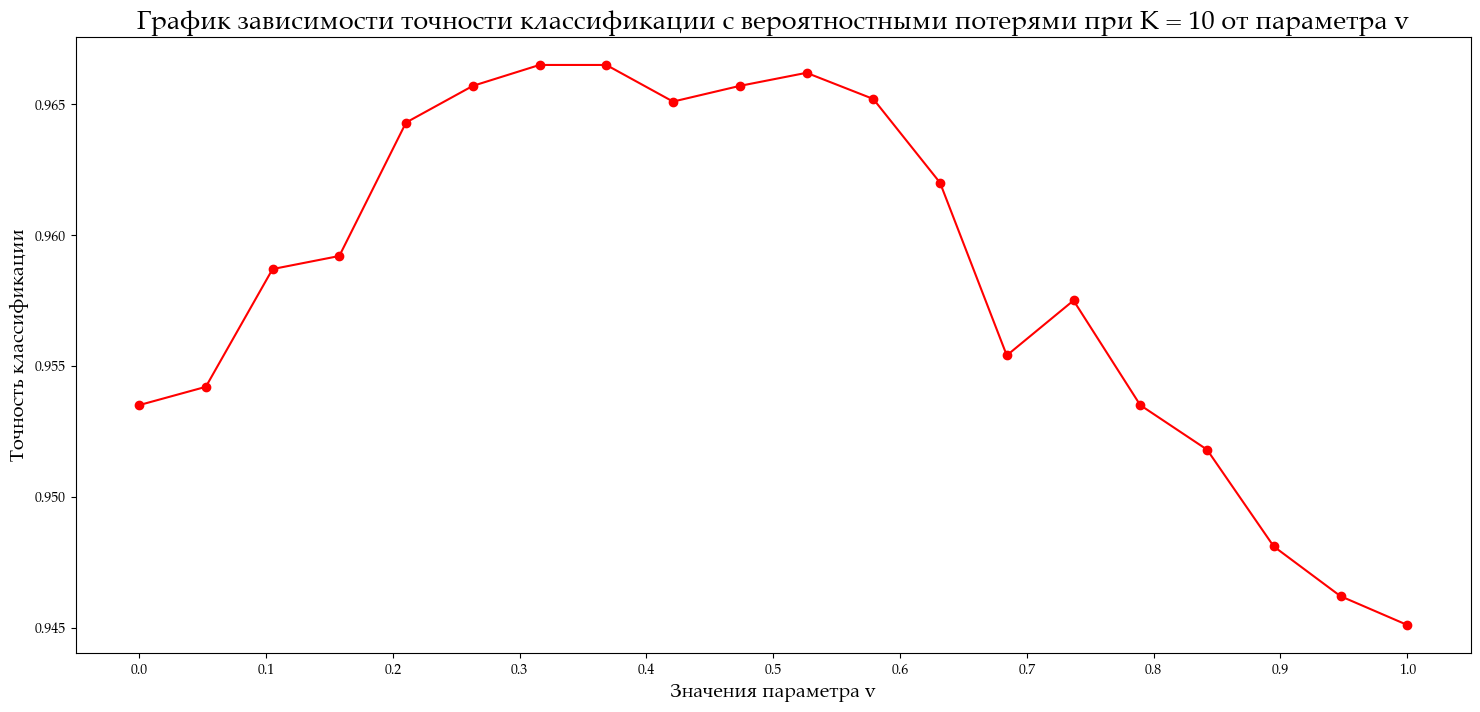

In [193]:
fig = plt.figure(figsize=(18, 8))
plt.plot(res_map_infonce_k_10.keys(), res_map_infonce_k_10.values(), color='red', marker='.', ms=12)
plt.title('График зависимости точности классификации с вероятностными потерями при K = 10 от параметра v', fontsize=19)
plt.xlabel('Значения параметра v', fontsize=14)
plt.ylabel('Точность классификации', fontsize=14)
plt.xticks(np.arange(0, 1.1, 0.1))
# plt.yticks(np.arange(0, 2.2, 0.2))
plt.show()

In [194]:
fig.savefig('infonce_loss_k_10.pdf', format='pdf', dpi=600)

Zapf NOT subset; don't know how to subset; dropped
fdsc NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


In [190]:
res_map_infonce_k_20

{0.0: 0.9591,
 0.05263157894736842: 0.9502,
 0.10526315789473684: 0.9515,
 0.15789473684210525: 0.9528,
 0.21052631578947367: 0.9563,
 0.2631578947368421: 0.9662,
 0.3157894736842105: 0.9647,
 0.3684210526315789: 0.9685,
 0.42105263157894735: 0.9734,
 0.47368421052631576: 0.9672,
 0.5263157894736842: 0.9695,
 0.5789473684210527: 0.9671,
 0.631578947368421: 0.9723,
 0.6842105263157894: 0.9705,
 0.7368421052631579: 0.9686,
 0.7894736842105263: 0.9626,
 0.8421052631578947: 0.9602,
 0.894736842105263: 0.9628,
 0.9473684210526315: 0.9571,
 1.0: 0.9556}

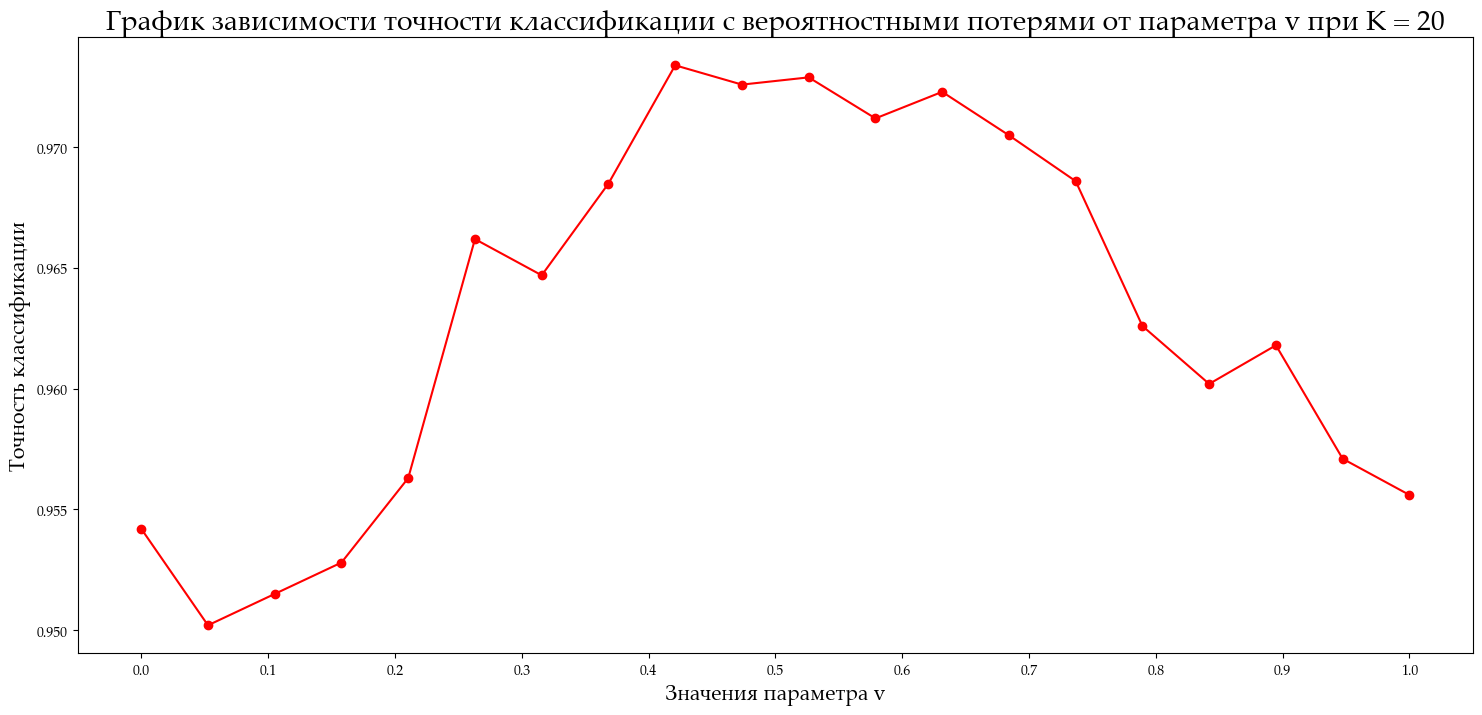

In [10]:
fig = plt.figure(figsize=(18, 8))
plt.plot(res_map_infonce_k_20.keys(), res_map_infonce_k_20.values(), color='red', marker='.', ms=12)
plt.title('График зависимости точности классификации с вероятностными потерями от параметра v при K = 20', fontsize=20)
plt.xlabel('Значения параметра v', fontsize=15)
plt.ylabel('Точность классификации', fontsize=15)
plt.xticks(np.arange(0, 1.1, 0.1))
# plt.yticks(np.arange(0, 2.2, 0.2))
plt.show()

In [11]:
fig.savefig('infonce_loss_k_20_acc.pdf', format='pdf', dpi=600)

Zapf NOT subset; don't know how to subset; dropped
fdsc NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
